In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATASET_PATH = "../data/raw"   # adjust if needed
classes = sorted(os.listdir(DATASET_PATH))
classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [4]:
print("Class Distribution:\n")

# Create an empty dictionary to store image counts for each class
class_counts = {}

# Loop through each class name in the 'classes' list
for cls in classes:
    
    # Build the full path to the directory of the current class
    class_dir = os.path.join(DATASET_PATH, cls)
    
    # Get all image files in the class directory
    # Only files ending with .jpg, .png, or .jpeg are counted (case-insensitive)
    images = [
        img for img in os.listdir(class_dir)
        if img.lower().endswith(('.jpg', '.png', '.jpeg'))
    ]
    
    # Store the number of images for this class in the dictionary
    class_counts[cls] = len(images)
    
    print(f"{cls}: {len(images)} images")


Class Distribution:

cardboard: 259 images
glass: 401 images
metal: 328 images
paper: 476 images
plastic: 386 images
trash: 110 images


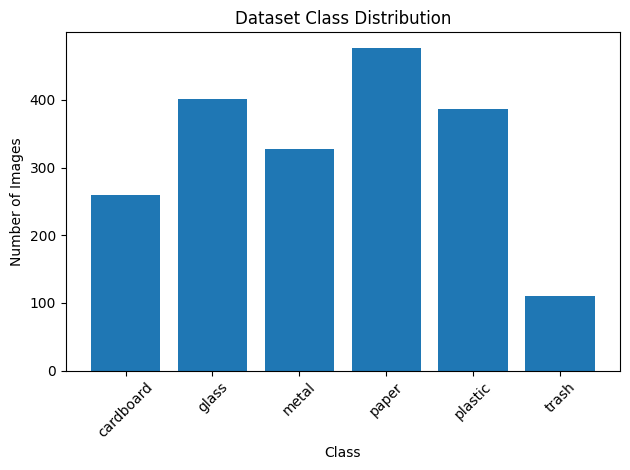

In [5]:
# Create a bar chart showing the number of images per class
plt.bar(class_counts.keys(), class_counts.values())

# Set the title of the plot
plt.title("Dataset Class Distribution")

# Label the x-axis (class names)
plt.xlabel("Class")

# Label the y-axis (number of images in each class)
plt.ylabel("Number of Images")

# Rotate x-axis labels to improve readability
plt.xticks(rotation=45)

# Adjust layout to prevent labels from overlapping or being cut off
plt.tight_layout()


plt.show()


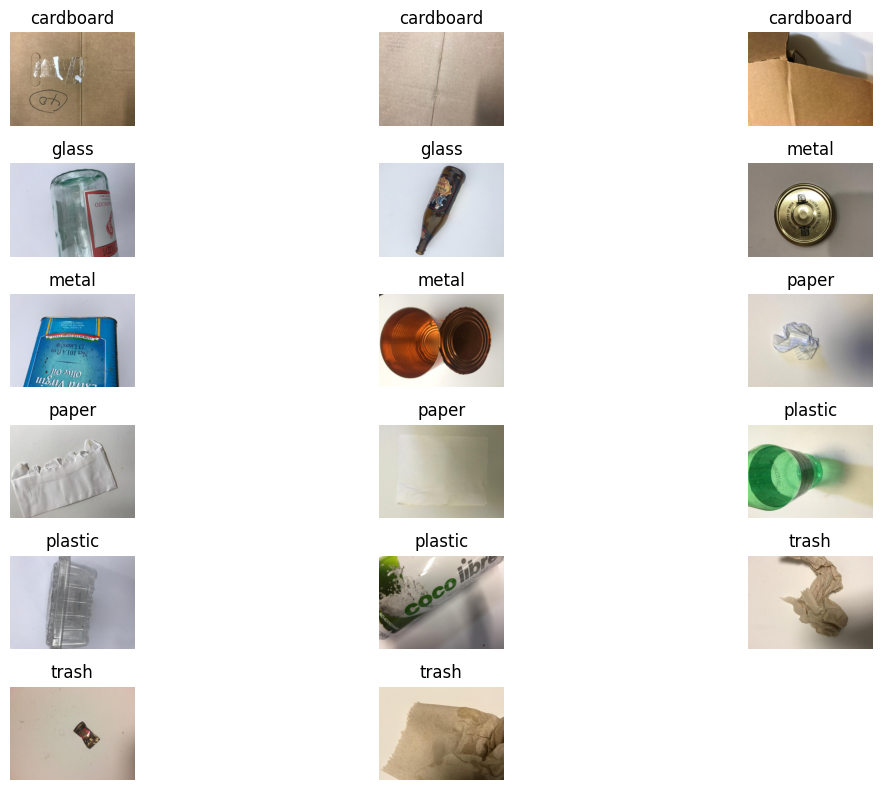

In [6]:
def show_samples(dataset_path, classes, samples_per_class=3):
    plt.figure(figsize=(12, 8))
    idx = 1

    for cls in classes:
        class_dir = os.path.join(dataset_path, cls)

        # Only select valid image files
        images = [
            img for img in os.listdir(class_dir)
            if img.lower().endswith(('.jpg', '.jpeg', '.png'))
        ][:samples_per_class]

        for img_name in images:
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)

            # Skip if image failed to load
            if img is None:
                print(f"Warning: Could not load {img_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(classes), samples_per_class, idx)
            plt.imshow(img)
            plt.title(cls)
            plt.axis("off")
            idx += 1

    plt.tight_layout()
    plt.show()

show_samples(DATASET_PATH,classes)

In [7]:
image_shapes = []

for cls in classes:
    class_dir = os.path.join(DATASET_PATH, cls)
    for img_name in os.listdir(class_dir)[:10]:
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_shapes.append(img.shape)

print("Sample image shapes:")
for shape in set(image_shapes):
    print(shape)


Sample image shapes:
(384, 512, 3)


❌ Corrupted images found: 95


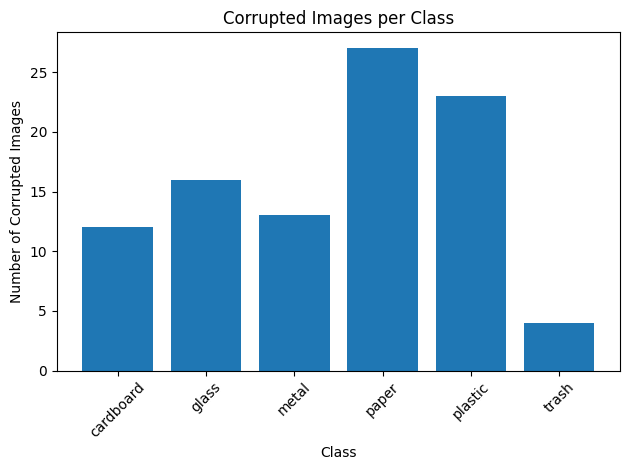

In [9]:
# Create an empty list to store paths of corrupted images
corrupted = []

# Dictionary to count corrupted images per class
corrupted_per_class = {}

for cls in classes:
    class_dir = os.path.join(DATASET_PATH, cls)
    corrupted_per_class[cls] = 0

    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        img = cv2.imread(img_path)

        # If the image failed to load, mark it as corrupted
        if img is None:
            corrupted.append(img_path)
            corrupted_per_class[cls] += 1

# Print total number of corrupted images
print(f"❌ Corrupted images found: {len(corrupted)}")

# Visualize corrupted images per class
plt.bar(corrupted_per_class.keys(), corrupted_per_class.values())
plt.title("Corrupted Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Corrupted Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
